# Finite Difference Operators in Many Dimensions using Kronecker Products
**Prof. Tony Saad (<a>www.tsaad.net</a>) <br/>Department of Chemical Engineering <br/>University of Utah**
<hr/>

It is very easy to build complex 2D and 3D finite difference operators using Kronecker products. We will start by defining a basic forward difference operator for the first derivative. We can choose other operators as well, but this particular case produces tight stencils for Laplacians.

The forward difference is given by
\begin{equation}
\frac{\text{d}u}{\text{d}x} = \frac{u_{i+1} - u_{i}}{\Delta x}
\end{equation}

In operator form, and for a periodic case on a 1D grid, this operator looks like
\begin{equation}
\mathbf{D}^+ =
\left[ {\begin{array}{*{20}{c}}
{ - 1}&1&{}&{}&{}\\
{}&{ - 1}&1&{}&{}\\
{}&{}&{ - 1}&1&{}\\
{}&{}&{}&{ - 1}&1\\
1&{}&{}&{}&{ - 1}
\end{array}} \right]
\end{equation}

For periodic boundaries, this operator can be defined in Python as
```Python
def d_plus(n, dx=1):
    # periodic forward difference
    d =  np.ones(n, dtype=int)
    ud = np.ones(n-1, dtype=int)
    D = diag(-d) + diag(ud,1)
    D[-1,0] = 1
    return D/dx
```

We will also need a backward difference operator, $\mathbf{D}^-$, to enable us to compute second derivatives and Laplacians. It can be shown that $\mathbf{D}^-$ is given by the negative of the transpose of $\mathbf{D}^+$
\begin{equation}
\mathbf{D}^- = - \mathbf{D}^{+T}
\end{equation}

# Two-Dimensions

To construct forward and backward difference operators for an entire 2D grid, we can using the Kronecker product. For a uniform structured grid of size $N_x \times N_y$ we can construct four operators: $\mathbf{D}_x^+$, $\mathbf{D}_x^-$, $\mathbf{D}_y^+$, $\mathbf{D}_y^-$ where the subscript refers to the direction in which the derivative is taken, e.g. $\mathbf{D}_y^+ u= \frac{\partial u}{\partial y}$ represents the forward difference approximation of $\frac{\partial u}{\partial y}$.

The Kronecker product, defined via the symbol $\otimes$, is simply a way to produce matrices based on matrix outer products. Given matrices $\mathbf{A} = a_{ij}$ and $\mathbf{B} = b_{ij}$, then
\begin{equation}
\mathbf{A}\otimes\mathbf{B} = \begin{bmatrix} a_{11} \mathbf{B} & \cdots & a_{1n}\mathbf{B} \\ \vdots & \ddots & \vdots \\ a_{m1} \mathbf{B} & \cdots & a_{mn} \mathbf{B} \end{bmatrix}
\end{equation}

An example from Wikipedia is

\begin{equation}
  \begin{bmatrix}
    1 & 2 \\
    3 & 4 \\
  \end{bmatrix}
  \otimes
  \begin{bmatrix}
    0 & 5 \\
    6 & 7 \\
  \end{bmatrix}=
  \begin{bmatrix}
    1 \cdot \begin{bmatrix}
      0 & 5 \\
      6 & 7 \\
    \end{bmatrix} & 
    2 \cdot \begin{bmatrix}
      0 & 5 \\
      6 & 7 \\
    \end{bmatrix} \\
    3 \cdot \begin{bmatrix}
      0 & 5 \\
      6 & 7 \\
    \end{bmatrix} & 
    4 \cdot \begin{bmatrix}
      0 & 5 \\
      6 & 7 \\
    \end{bmatrix} \\
  \end{bmatrix}=
  \begin{bmatrix}
    1\cdot 0 & 1\cdot 5 & 2\cdot 0 & 2\cdot 5 \\
    1\cdot 6 & 1\cdot 7 & 2\cdot 6 & 2\cdot 7 \\
    3\cdot 0 & 3\cdot 5 & 4\cdot 0 & 4\cdot 5 \\
    3\cdot 6 & 3\cdot 7 & 4\cdot 6 & 4\cdot 7 \\
  \end{bmatrix}.
  \end{equation}

Back to our finite difference operators, on a 2D grid, we have the following
\begin{equation}
\bf{D}_x^ +  = \left[ \begin{array}{*{20}{c}}
\bf{D}^+ &{}&{}&{}&{}\\
{}&\bf{D}^+&{}&{}&{}\\
{}&{}& \ddots &{}&{}\\
{}&{}&{}& \ddots &{}\\
{}&{}&{}&{}&\bf{D}^+
\end{array} \right] = \bf{I}_y \otimes \bf{D}^+({N_y})
\end{equation}
where $\mathbf{I}_y$ is the identity matrix of size $N_y\times N_y$ and $\mathbf{D}^+$ is of size $N_x\times N_x$. Similarly, we have
\begin{equation}
\mathbf{D}_x^- =  \mathbf{I}_y\otimes \mathbf{D}^-(N_x)
\end{equation}
The effect of the Kronecker product $\mathbf{I}_y\otimes \mathbf{D}$ is to replicate $\mathbf{D}$ by $N_y$ times.

The situation is a bit more different for the $y$-derivatives. In this case, we want to offset the off-diagonal components of $\mathbf{D}$ by $N_x$, i.e. $(i+1, j) \to (i, j+1)$. To do this, we have to right-multiply $\mathbf{D}$ by $\mathbf{I}_x$.
\begin{equation}
\mathbf{D}_y^+ = \mathbf{D}^+(N_y) \otimes  \mathbf{I}_x
\end{equation}
and
\begin{equation}
\mathbf{D}_y^- = \mathbf{D}^-(N_y) \otimes  \mathbf{I}_x
\end{equation}
where $\mathbf{I}_x$ is the identity matrix of size $N_x\times N_x$ and $\mathbf{D}^{+,-}$ is of size $N_y\times N_y$.

# Three Dimensions

In three dimensions, the operators can be constructed as follows
\begin{equation}
\mathbf{D_x^{+,-}} = \mathbf{I}_z \otimes \mathbf{I}_y \otimes \mathbf{D}^{+,-} \\
\mathbf{D_y^{+,-}} = \mathbf{I}_z \otimes \mathbf{D}^{+,-} \otimes \mathbf{I}_x \\
\mathbf{D_z^{+,-}} = \mathbf{D}^{+,-} \otimes \mathbf{I}_y \otimes \mathbf{I}_x \\ 
\end{equation}

**Bottom Line**
1. $\mathbf{I}(N) \otimes \mathbf{B}(M)$ creates a block diagonal matrix of $\mathbf{B}$'s
2. $\mathbf{B}(M) \otimes \mathbf{I}(N)$ offsets the off-diagonal terms in $\mathbf{B}$ by $N$

## Implementation
We will implement the Kronecker product formulation in a single class called `GridOps`

In [1]:
import numpy as np
from numpy import zeros, ones, eye, diag, kron

class GridOps:
    '''
    Creates x, y, and z-direction 2D, or 3D versions of a 1D operator defined by Op1D.
    N : A list or array containing the grid dimensions, [Nx, Ny, Nz].
    Op1D: The name of a basic 1D operator. Op1D must be of the form Op1D(n,h) where n is a single valued integer
    designating the number of points in that one-dimension and h is the spacing.
    Δ : A list or array containing the grid spacing, [dx, dy, dz]. Defaults to [1,1,1]
    '''
    def __init__(self, Op1D, N, Δ=[1,1,1]):
        self.N = N
        self.Δ = Δ
        self.Op1D = Op1D
    
    def OpX(self):
        '''
        Creates x-direction 2D, or 3D versions of a 1D operator defined by Op.
        '''        
        N = self.N
        Δ = self.Δ
        Op = self.Op1D
        return kron(eye(N[2]), kron(eye(N[1]), Op (N[0],Δ[0]) ) )
    
    def OpY(self):
        '''
        Creates y-direction 2D, or 3D versions of a 1D operator defined by Op.
        '''
        N = self.N
        Δ = self.Δ
        Op = self.Op1D
        return kron( eye(N[2]), kron(Op(N[1],Δ[1]),  eye(N[0]) ) ) 

    def OpZ(self):
        '''
        Creates z-direction 2D, or 3D versions of a 1D operator defined by Op.
        '''        
        N = self.N
        Δ = self.Δ
        Op = self.Op1D        
        return kron(Op(N[2],Δ[2]), kron(eye(N[1]), eye(N[0]) ) )  
    
    def Sum(self):
        return self.OpX() + self.OpY() + self.OpZ()

Below are some example 1D finite difference operators

In [2]:
def d_plus1d(n, h=1):
    '''
    Defines a basic forward difference operator in 1D (first derivative, first order)
    '''
    # periodic forward difference
    d =  np.ones(n, dtype=int)
    ud = np.ones(n-1, dtype=int)
    D = diag(-d) + diag(ud,1)
    D[-1,0] = 1
    return D/h

def d_minus1d(n, h=1):
    '''
    Defines a basic backward difference operator in 1D (first derivative, first order)
    '''
    return -d_plus1d(n,h).T

def laplacian1d(n, h=1):
    '''
    Defines a basic 1D Laplacian operator (second derivative), cell centered, second order
    '''    
    result = 0 if n <= 1 else d_plus1d(n,h) @ d_minus1d(n,h)
    return result

In [3]:
print(d_plus1d(5))

[[-1.  1.  0.  0.  0.]
 [ 0. -1.  1.  0.  0.]
 [ 0.  0. -1.  1.  0.]
 [ 0.  0.  0. -1.  1.]
 [ 1.  0.  0.  0. -1.]]


In [4]:
print(d_minus1d(5))

[[ 1. -0. -0. -0. -1.]
 [-1.  1. -0. -0. -0.]
 [-0. -1.  1. -0. -0.]
 [-0. -0. -1.  1. -0.]
 [-0. -0. -0. -1.  1.]]


In [5]:
print(laplacian1d(5))

[[-2.  1.  0.  0.  1.]
 [ 1. -2.  1.  0.  0.]
 [ 0.  1. -2.  1.  0.]
 [ 0.  0.  1. -2.  1.]
 [ 1.  0.  0.  1. -2.]]


## Two Dimensional Example
In what follows, we build a few 2D versions of the operators we defined above

In [6]:
import numpy as np
from numpy import zeros, ones, eye, diag, kron
%matplotlib inline
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'

In [7]:
N = [3,3,1] # set grid size to 4x4

To define 2D versions of $\mathbf{D}^{+,-}$ and the 1d Laplacian, we simply call the class `GridOps`

In [8]:
Dplus2D  = GridOps(d_plus1d, N)
Dminus2D = GridOps(d_minus1d, N)
Lap2D    = GridOps(laplacian1d, N)

We can now visualize these operators by accessing the methods defined by `GridOps`. For example, The forward difference version of $\partial/\partial x$ on this 2D Grid is given calling `OpX()` on the corresponding `GridOps`

[[-1.  1.  0. -0.  0.  0. -0.  0.  0.]
 [ 0. -1.  1.  0. -0.  0.  0. -0.  0.]
 [ 1.  0. -1.  0.  0. -0.  0.  0. -0.]
 [-0.  0.  0. -1.  1.  0. -0.  0.  0.]
 [ 0. -0.  0.  0. -1.  1.  0. -0.  0.]
 [ 0.  0. -0.  1.  0. -1.  0.  0. -0.]
 [-0.  0.  0. -0.  0.  0. -1.  1.  0.]
 [ 0. -0.  0.  0. -0.  0.  0. -1.  1.]
 [ 0.  0. -0.  0.  0. -0.  1.  0. -1.]]


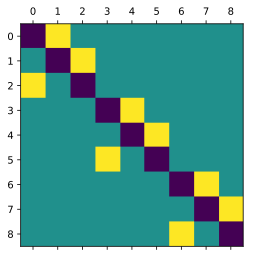

In [9]:
Dxp = Dplus2D.OpX()
print(Dxp)
plt.matshow(Dxp)

Similary, the backward difference representation of $\partial / \partial y$ is

[[ 1.  0.  0. -0. -0. -0. -1. -0. -0.]
 [ 0.  1.  0. -0. -0. -0. -0. -1. -0.]
 [ 0.  0.  1. -0. -0. -0. -0. -0. -1.]
 [-1. -0. -0.  1.  0.  0. -0. -0. -0.]
 [-0. -1. -0.  0.  1.  0. -0. -0. -0.]
 [-0. -0. -1.  0.  0.  1. -0. -0. -0.]
 [-0. -0. -0. -1. -0. -0.  1.  0.  0.]
 [-0. -0. -0. -0. -1. -0.  0.  1.  0.]
 [-0. -0. -0. -0. -0. -1.  0.  0.  1.]]


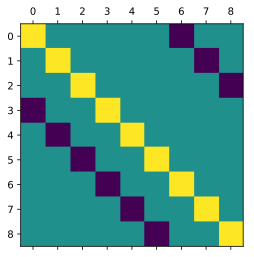

In [10]:
Dym = Dminus2D.OpY()
print(Dym)
plt.matshow(Dym)

The Laplacian can be composed by adding `OpX()` and `OpY()'

[[-4.  1.  1.  1.  0.  0.  1.  0.  0.]
 [ 1. -4.  1.  0.  1.  0.  0.  1.  0.]
 [ 1.  1. -4.  0.  0.  1.  0.  0.  1.]
 [ 1.  0.  0. -4.  1.  1.  1.  0.  0.]
 [ 0.  1.  0.  1. -4.  1.  0.  1.  0.]
 [ 0.  0.  1.  1.  1. -4.  0.  0.  1.]
 [ 1.  0.  0.  1.  0.  0. -4.  1.  1.]
 [ 0.  1.  0.  0.  1.  0.  1. -4.  1.]
 [ 0.  0.  1.  0.  0.  1.  1.  1. -4.]]


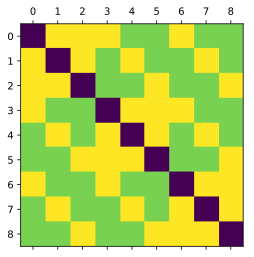

In [11]:
DG = Lap2D.OpX() + Lap2D.OpY()
print(DG)
plt.matshow(DG)

## Example: Helmholtz Hodge Decomposition

We use the operators to conduct a projection
\begin{equation}
\mathbf{u} = \mathbf{u}_\perp + \nabla \phi
\end{equation}
such that $\nabla\cdot\mathbf{u}_\perp = 0$. Then, we take the divergence
\begin{equation}
\nabla \cdot \mathbf{u} =  \nabla^2 \phi
\end{equation}
In terms of operators, we have
\begin{equation}
D \mathbf{u} =  D G\phi
\end{equation}
then
\begin{equation}
\phi = (D G)^{-1} D \mathbf{u}
\end{equation}
and finally
\begin{equation}
\mathbf{u}_\perp =  \mathbf{u} - G \phi = \mathbf{u} - G (D G)^{-1} D \mathbf{u}
\end{equation}



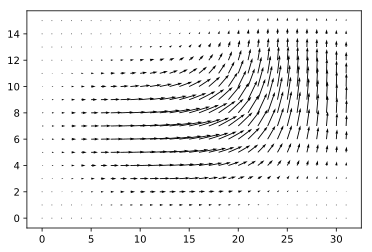

In [12]:
nx = 32
ny = 16
N = [nx, ny, 1]

X0 = 0.0
Xl = 1.0
Y0 = 0.0
Yl = 0.5
x_ = np.linspace(0,1,nx)
y_ = np.linspace(0,1,ny)

dx = (Xl-X0)/(nx-1) if nx!=1 else 1
dy = (Yl-Y0)/(ny-1) if ny!=1 else 1
Δ = [dx, dy, 1.0]

X,Y = np.meshgrid(x_,y_)

a = 1.0
b = 0.7
c = 0.2

ux = a*np.exp((-(X-b+0.25)**2)/(2*c**2) -((Y-b+0.25)**2)/(2*c**2))
uy = a*np.exp((-(X-b-0.1)**2)/(2*c**2) -((Y-b+0.1)**2)/(2*c**2))

plt.quiver(ux,uy)
# plt.contourf(X,Y,ux,10,cmap="RdBu_r")

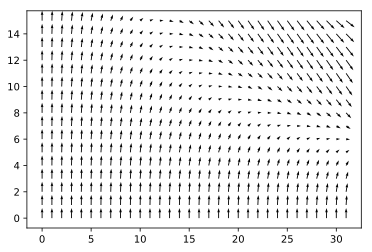

In [13]:
ux = np.sin(X*Y)
uy = np.cos(4.0*X*Y)
plt.quiver(ux,uy)

In [14]:
Dplus2D  = GridOps(d_plus1d, N, Δ)
Dminus2D = GridOps(d_minus1d, N, Δ)
Lap2D    = GridOps(laplacian1d, N, Δ)

div_x  = Dplus2D.OpX()
div_y  = Dplus2D.OpY()

grad_x = Dminus2D.OpX()
grad_y = Dminus2D.OpY()

DG = div_x@grad_x + div_y@grad_y
DG[0]= 0
DG[0,0] = 1.0
print(np.linalg.cond(DG))
DG_inv = np.linalg.inv(DG)
Du = div_x@ux.ravel() + div_y@uy.ravel()
phi = DG_inv@Du

168393.32145055934


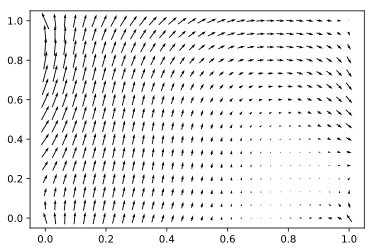

In [15]:
uxperp = ux.ravel() - grad_x@phi
uyperp = uy.ravel() - grad_y@phi
plt.quiver(X,Y,uxperp.reshape(nx,ny), uyperp.reshape(nx,ny),pivot='middle')

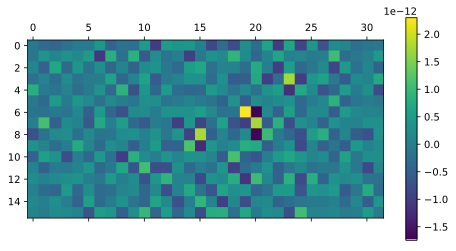

In [16]:
div_uperp = div_x@uxperp.ravel() + div_y@uyperp.ravel()
plt.matshow(div_uperp.reshape(ny,nx))
plt.colorbar()

## Three Dimensions

Text(0.5,1.05,'$\nabla^2$, central diff \n')

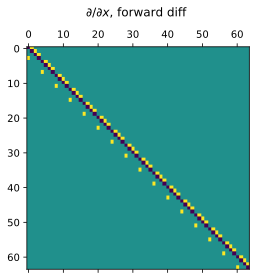

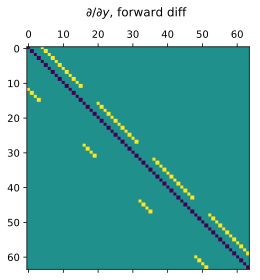

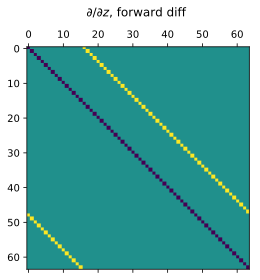

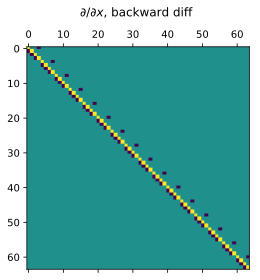

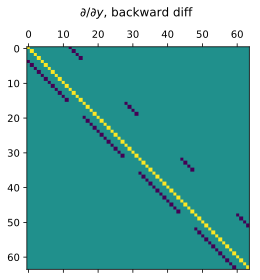

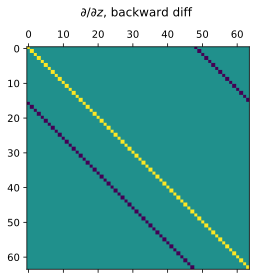

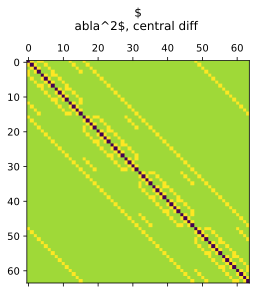

In [17]:
N=[4,4,4]

Dplus3D  = GridOps(d_plus1d, N)
Dminus3D = GridOps(d_minus1d, N)
Lap3D    = GridOps(laplacian1d, N)

plt.matshow(Dplus3D.OpX())
plt.title('$\partial / \partial x$, forward diff \n')

plt.matshow(Dplus3D.OpY())
plt.title('$\partial / \partial y$, forward diff \n')

plt.matshow(Dplus3D.OpZ())
plt.title('$\partial / \partial z$, forward diff \n')

plt.matshow(Dminus3D.OpX())
plt.title('$\partial / \partial x$, backward diff \n')

plt.matshow(Dminus3D.OpY())
plt.title('$\partial / \partial y$, backward diff \n')

plt.matshow(Dminus3D.OpZ())
plt.title('$\partial / \partial z$, backward diff \n')

DG = Lap3D.Sum()
plt.matshow(DG)
plt.title('$\nabla^2$, central diff \n')

In [18]:
import urllib
import requests
from IPython.core.display import HTML
def css_styling():
    styles = requests.get("https://raw.githubusercontent.com/saadtony/NumericalMethods/master/styles/custom.css")
    return HTML(styles.text)
css_styling()
